Creating Word Embeddings with Brian Spiering
-------
<center><img src="https://imgs.xkcd.com/comics/machine_learning.png" width="500"/></center>

Who am I?
-----

<center><img src="images/profile.JPG" width="500"/></center>

Brian Spiering 

Computer Science (CS) faculty (new-ish)  
Natural Language Processing (NLP) and Artificial Intelligence (AI) (mostly)

If you want to follow along with these slides…
------

[bit.ly/word-workshop](http://bit.ly/word-workshop)

By The End Of This Session You Should Be Able To:
---

- Describe why word2vec is popular and powerful
- Explain how word2vec is a neural network
- Understand the common architectures of word2vec

5 Is of Technology: Word Embeddings
-------

1. Information - What is it?
1. Inspiration - Why is it important?
1. Install - How do I set it up?
1. Implementation - How do I use it?
1. Integration - How does it become automatic?

Pop Quiz
---

Do computers prefer numbers or words?



__Numbers__

1. Information: What are Word Embeddings?
-----

<br>
<br>
Word Embedding are a collection of algorithms that map words (strings) to numbers (vectors - lists of floats).
</details>

2. Inspiration - Why is it important?
-----

Turns text into a numerical form (meaningful word vectors) that Deep Learning and machine learning algorithms can in-turn use.

How does word2vec work?
----

<img src="images/firth.png" style="width: 300px;"/>

>“You shall know a word
>by the company it keeps”

> \- J. R. Firth 1957

Distributional Hypothesis
---

> Words that are used and occur in the same contexts tend to have similar meanings

__Example:__  
> ... government debt problems are turning into __banking__ crises...  

> ... Europe governments needs unified __banking__ regulation to replace the hodgepodge of debt regulations...

The words: _government_, _regulation_ and _debt_ probably represent some aspect of _banking_ since they frequently appear near by.

The words: _Pokeman_ and _tublar_ probably don't represent some aspect of _banking_ since they don't frequently appear near by.

How does word2vec model the Distributional Hypothesis?
---

word2Vec is a very simple neural network:

<center><img src="images/w2v_neural_net.png" width="700"/></center>


[Source](http://www-personal.umich.edu/~ronxin/pdf/w2vexp.pdf)

A Simplified version of word2vec
------

<center><img src="http://adventuresinmachinelearning.com/wp-content/uploads/2017/07/Word2Vec-softmax.jpg" width="700"/></center>

Once the training is complete, the output softmax layer is discarded and the remaining weights become the embedding layer

word2vec as a compression algorithm
-----

<center><img src="images/w2v_neural_net.png" width="700"/></center>

Note the bow-tie shape. That is is an __autoencoder__. 

Autoencoders compress sparse representations into dense representation. 

Learns the mapping that best preserves the structure of the original space.

Story time...
---

<img src="http://worldartsme.com/images/king-and-queen-clipart-1.jpg" style="width: 400px;"/>

A man and woman meet each other ...

They become king and queen ...

They got old and stop talking to each other. Instead, they read books and magazines ...

In [6]:
# Represent data
corpus = """The man and woman meet each other ...
         The man and woman become king and queen ...
         The king and queen get old and stop talking to each other. Instead, they read books and magazines ...
         """

In [7]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [8]:
# Assign the words to vectors by hand
important_words = ['queen', 'book', 'king', 'magazine', 'woman', 'man']

vectors = np.array([[0.1,   0.3],  # queen
                    [-0.5, -0.1],  # book
                    [0.2,   0.2],  # king
                    [-0.3, -0.2],  # magazine
                    [-0.5,  0.4],  # car
                    [-0.45, 0.3]]) # bike

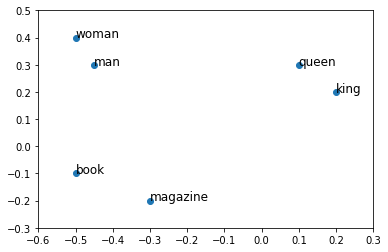

In [9]:
# Plot the most important words
plt.plot(vectors[:,0], vectors[:,1], 'o')
plt.xlim(-0.6, 0.3)
plt.ylim(-0.3, 0.5)
for word, x, y in zip(important_words, vectors[:,0], vectors[:,1]):
    plt.annotate(word, (x, y), size=12)

Check for understanding
---

How many dimensions are data represented in? 

There are 2 dimensions. 

How many dimensions would we need to represent for naive word vectors? 

5 dimensions

Typically you would use n-1 word vectors, a baseline word would be coded as all zeros.

```python
# Encode each word using 1-hot encoding
{'queen':    [0, 0, 0, 0, 0],
 'book':     [0, 0, 0, 0, 1],
 'king':     [0, 0, 0, 1, 0],
 'magazine': [0, 0, 1, 0, 0],
 'woman':    [0, 1, 0, 0, 0],
 'man':      [1, 0, 0, 0, 0],
}
```

word2vec creates low-dimensional, dense vectors
====

In contrast to other NLP encodings which are larger and sparser

What are the differences between the representations of images or sound compared to text?
--------
<center><img src="images/representation.png" width="700"/></center>
<center><img src="images/doc_matrix.png" width="500"/></center>

<center><img src="images/w2v_neural_net.png" width="700"/></center>

The vectors are the weights in the neural network. Each hidden node is a dimension.

The dimensions are not directly interpretable.

The 2 architectures of word2vec training
----



1) “Skip-gram”: Each current word as an input to a log-linear classifier to predict words within a certain range before and after that current word


2) “Continuous bag of words”: Predict a missing word in a sentence ased on the surrounding context

Skip-gram architecture: <br> Given the current word, predict the context (surrounding words)
----

<center><img src="images/skip-gram.png" width="700"/></center>




Skip-gram example
---

>“Insurgents killed in ongoing fighting”


```
bi-grams = {insurgents killed, killed in, in ongoing, ongoing fighting}.  

skip-two-bi-grams = {insurgents killed, insurgents in, insurgents ongoing, killed in, killed ongoing, killed fighting, in ongoing, in fighting, ongoing fighting}.  
```

Defining skip-grams
---

<img src="images/skip-gram-equation.png" style="width: 400px;"/>


Skip-Gram architecture, deep dive
----

<img src="images/skip_gram_detailed.png" style="width: 400px;"/>

The target word is now at the input layer, and the context words are on the output layer.

On the output layer, instead of outputing one multinomial distribution, we are outputing C multinomial distributions. Each output is computed using the same hidden to output matrix


Continuous bag of words (CBOW) architecture: <br>Given the context (surrounding words), predict the current word
----

<center><img src="images/cbow.png" width="700"/></center>



[Detailed explanation](http://alexminnaar.com/word2vec-tutorial-part-ii-the-continuous-bag-of-words-model.html)

CBOW vs. Skip-gram
----

CBOW is several times faster to train than the skip-gram and has slightly better accuracy for  frequent words.  

Skip-gram works well with a small amount of the training data and well represents rare words.

__Skip-gram is the most common architecture.__

Summary
------

<center><img src="images/book.png" width="700"/></center>

Summary
----

- word2vec: Create a dense vector representation of words that models semantic meaning based on context
- Word2Vec is popular because it is straight forward to implement and creates dense embedding vectors.
- Word2Vec is a _relatively_ simple neural net with 1 input layer, 1 hidden layer, and 1 output layer.
- There are 2 common ways to represent context: 
    1. CBOW: given context, predict word
    2. skip-gram: given word, predict context
- Sets you up for machine learning and Deep Learning

<br>
<br> 
<br>

----